<a href="https://colab.research.google.com/github/nupursjsu/Advanced-Deep-Learning/blob/master/Raga_Identification_MFCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(1)

import tensorflow.keras as keras
import matplotlib.pyplot as plt

import random
random.seed(1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Some important commands

# !gdown --id 1OwgxRgeH2sqVB4-szobd16ClItJtyFo2

# import zipfile
# with zipfile.ZipFile('/content/drive/MyDrive/RagaDatasetNew.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/processed')

# !find . -name ".DS_Store" -delete

# !rm -rf /content/processed/__MACOSX

In [4]:
DATA_PATH = "/content/drive/MyDrive/Raga_Data/data_10.json"

In [5]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

In [6]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [7]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [8]:
def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.GRU(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(5, activation='softmax'))

    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 130, 64)           19968     
_________________________________________________________________
gru (GRU)                    (None, 64)                24960     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 49,413
Trainable params: 49,413
Non-trainable params: 0
_________________________________________________________________
Epoch 1/800
27/27 [==============================] - 33s 52ms/step - loss: 1.6561 - accuracy: 0.1664 - val_loss: 1.571

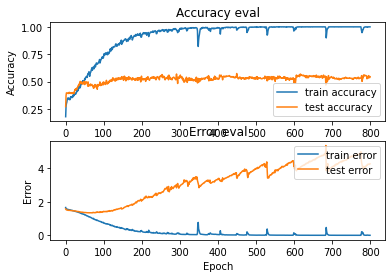

11/11 - 0s - loss: 4.1275 - accuracy: 0.5661

Test accuracy: 0.5660919547080994


In [9]:
if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=800)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

In [10]:
model.save('raga_identification.h5')

In [18]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [20]:
!zip -r /content/file.zip /content/my_model

  adding: content/my_model/ (stored 0%)
  adding: content/my_model/saved_model.pb (deflated 89%)
  adding: content/my_model/variables/ (stored 0%)
  adding: content/my_model/variables/variables.index (deflated 66%)
  adding: content/my_model/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/my_model/assets/ (stored 0%)


In [11]:
# !gdown --id 1OwgxRgeH2sqVB4-szobd16ClItJtyFo2

import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/RagaDatasetNew.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/processed')

In [12]:
import json
import os
import math
import librosa

DATASET_PATH = "/content/processed/RagaDatasetNew/Bhairavi/Ajoy Chakrabarty - Bhajan.mp3"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.

        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        # "mapping": [],
        # "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    signal, sample_rate = librosa.load(dataset_path, sr=SAMPLE_RATE)
    
    for d in range(num_segments):
      print(d)
      start = samples_per_segment * d
      finish = start + samples_per_segment
      mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
      mfcc = mfcc.T
      
      if len(mfcc) == num_mfcc_vectors_per_segment:
        data["mfcc"].append(mfcc.tolist())
        print("{}, segment:{}".format(dataset_path, d+1))
        
    with open(json_path, "w") as fp:
      json.dump(data, fp, indent=4)

In [5]:
!rm -rf /content/testdata.json

import librosa
import numpy as np
import keras
TESTDATA_PATH = "/content/Ajoy Chakrabarty - Aahir Bhairon.mp3"
y, sr = librosa.load(TESTDATA_PATH)
mfcc = librosa.feature.mfcc(y=y, sr=22050, hop_length=512, n_mfcc=13)
mfcc=mfcc.T

data = {
        "mfcc": []
    }
data["mfcc"].append(mfcc.tolist())

X = np.array(data["mfcc"])

model = keras.models.load_model('raga_identification.h5')

predictions = model.predict(X)
class_names[np.argmax(predictions)]
# print(X.shape)
# model.predict_classes(X)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(1, 25360, 13)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1])

In [14]:

print(X)

[[[-5.12386658e+02  3.05591404e-01  2.38366023e-01 ... -2.59462535e-01
   -1.65725410e-01 -4.82922494e-02]
  [-5.07997864e+02  5.89659643e+00  4.37191153e+00 ... -3.99493384e+00
   -3.79055762e+00 -3.27707338e+00]
  [-4.98861664e+02  1.60117874e+01  9.16501427e+00 ... -7.03584194e+00
   -9.38699722e+00 -9.84523010e+00]
  ...
  [-5.12619385e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-5.12619385e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-5.12619385e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]]


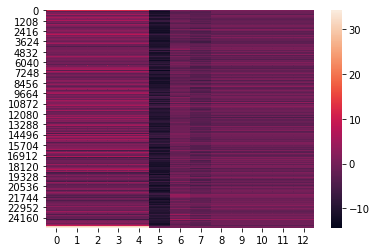

In [15]:
import seaborn as sns
mfcc_delta = librosa.feature.delta(mfcc)
sns.heatmap(mfcc_delta)

In [21]:
model = keras.models.load_model('raga_identification.h5')

predictions = model.predict(X)
print(X.shape)
model.predict_classes(X)

(1, 25360, 13)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1])

In [17]:
class_names = ['Ahira bhairav', 'Ba╠äge╠äs╠üri╠ä', 'Bhairavi', 'Bila╠äsakha╠äni╠ä to╠äd╠úi╠ä', 'De╠äs╠ü']

class_names[np.argmax(predictions)]

'Ba╠äge╠äs╠üri╠ä'